In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
# Define the objective function to be optimized
def objective_function(params):
    """
    This function defines the objective function to be optimized.
    It takes a parameter array `params` and returns the value of the objective function.

    Args:
    - params (numpy.ndarray): An array of parameters to evaluate the objective function on.

    Returns:
    - float: The value of the objective function evaluated at `params`.
    """
    x, y, z = params[0], params[1], params[2]
    return (x-4)**2 + (y-5)**2 + (z+6)**2

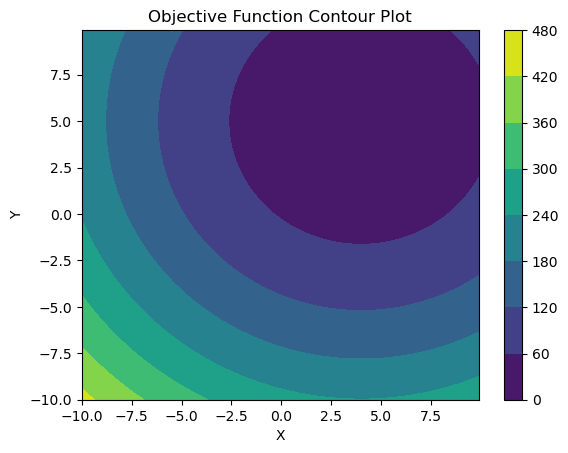

In [3]:
# define the ranges of the input parameters
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
z_range = np.arange(-10, 10, 0.1)

# create a meshgrid of the input parameters
X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')

# calculate the objective function value for each point in the meshgrid
objective = np.zeros((len(x_range), len(y_range), len(z_range)))
for i in range(len(x_range)):
    for j in range(len(y_range)):
        for k in range(len(z_range)):
            objective[i,j,k] = objective_function([x_range[i], y_range[j], z_range[k]])

# create a contour plot of the objective function
fig, ax = plt.subplots()
c = ax.contourf(X[:,:,0], Y[:,:,0], objective[:,:,0], cmap='viridis')
plt.colorbar(c)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Objective Function Contour Plot')
plt.show()

In [22]:
# Define the simulated annealing algorithm
def simulated_annealing(obj_func, bounds, t_init, t_final, cooling_rate):
    """
    This function implements the simulated annealing algorithm to optimize the objective function.
    It takes the objective function `obj_func`, parameter bounds `bounds`, initial temperature `t_init`,
    final temperature `t_final`, and cooling rate `cooling_rate` as inputs.

    Args:
    - obj_func (function): The objective function to optimize.
    - bounds (numpy.ndarray): An array of parameter bounds. Each row represents the lower and upper bounds for a parameter.
    - t_init (float): The initial temperature.
    - t_final (float): The final temperature.
    - cooling_rate (float): The cooling rate.

    Returns:
    - tuple: A tuple containing the final parameter array, the final objective function value, and a list of temperatures.
    """
    # Initialize the current solution and temperature
    num_params = bounds.shape[0]
    current_params = np.array([random.uniform(bounds[i][0], bounds[i][1]) for i in range(num_params)])
    current_solution = obj_func(current_params)
    t_current = t_init
    temperatures = [t_current]

    # Iterate until the temperature is below the final temperature
    while t_current > t_final:
        # Randomly perturb the current solution
        perturbed_params = current_params + np.random.normal(size=len(bounds))
        perturbed_params = np.clip(perturbed_params, bounds[:, 0], bounds[:, 1])
        perturbed_solution = obj_func(perturbed_params)

        # Calculate the change in solution quality
        delta = perturbed_solution - current_solution

        # If the perturbed solution is better, accept it as the new current solution
        if delta < 0:
            current_params = perturbed_params
            current_solution = perturbed_solution
        # If the perturbed solution is worse, accept it with a certain probability
        else:
            probability = math.exp(-delta / t_current)
            if random.random() < probability:
                current_params = perturbed_params
                current_solution = perturbed_solution

        # Decrease the temperature according to the cooling rate
        t_current *= cooling_rate
        temperatures.append(t_current)

    # Return the final solution and its quality, and the list of temperatures
    return current_params, current_solution, temperatures


def plot_cooling_rates(objective_function, bounds, t_init, t_final, cooling_rates):
    """
    Plots the temperature versus iteration for different cooling rates in the simulated annealing algorithm.

    Args:
    - objective_function (function): the objective function to be optimized
    - bounds (ndarray): an n x 2 numpy array where n is the number of parameters
        and each row contains the lower and upper bounds for a parameter
    - t_init (float): the initial temperature
    - t_final (float): the final temperature
    - cooling_rates (list): a list of cooling rates to be tested

    Returns:
    - None
    """
    # Initialize a dictionary to store the final solutions and qualities for each cooling rate
    results = {}

    # Iterate through the cooling rates and run the simulated annealing algorithm with each one
    for cooling_rate in cooling_rates:
        final_solution, final_quality, temperatures = simulated_annealing(objective_function, bounds, t_init, t_final, cooling_rate)
        print("Result for cooling rate ", cooling_rate, " is ", final_solution)
        results[cooling_rate] = {'solution': final_solution, 'quality': final_quality, 'temperatures': temperatures}

    print("The correct solution is: x=4, y=5 and z=-6 for our objective function (x-4)**2 + (y-5)**2 + (z+6)**2")
    print("______________________________________________")

    # Plot the results for each cooling rate on a single plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for cooling_rate in cooling_rates:
        temperatures = results[cooling_rate]['temperatures']
        quality = results[cooling_rate]['quality']
        ax.plot(temperatures, label=f"Cooling rate: {cooling_rate}, Quality: {quality:.2f}")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Temperature')
    ax.set_title('Temperature versus iteration for different cooling rates')
    ax.legend()
    plt.show()

Result for cooling rate  0.2  is  [-3.93771398  8.19434964  6.65230788]
Result for cooling rate  0.5  is  [ 9.9100695   5.60703356 -6.60802891]
Result for cooling rate  0.6  is  [-7.80280423  4.00074247  8.68090202]
Result for cooling rate  0.8  is  [ 3.51659797  3.61668298 -0.46758664]
Result for cooling rate  0.9  is  [ 4.11359674  4.31321943 -6.20261668]
Result for cooling rate  0.95  is  [ 4.36946618  5.12504368 -6.32076685]
Result for cooling rate  0.99  is  [ 4.0903601   4.98965742 -5.92690636]
The correct solution is: x=4, y=5 and z=-6 for our objective function (x-4)**2 + (y-5)**2 + (z+6)**2
______________________________________________


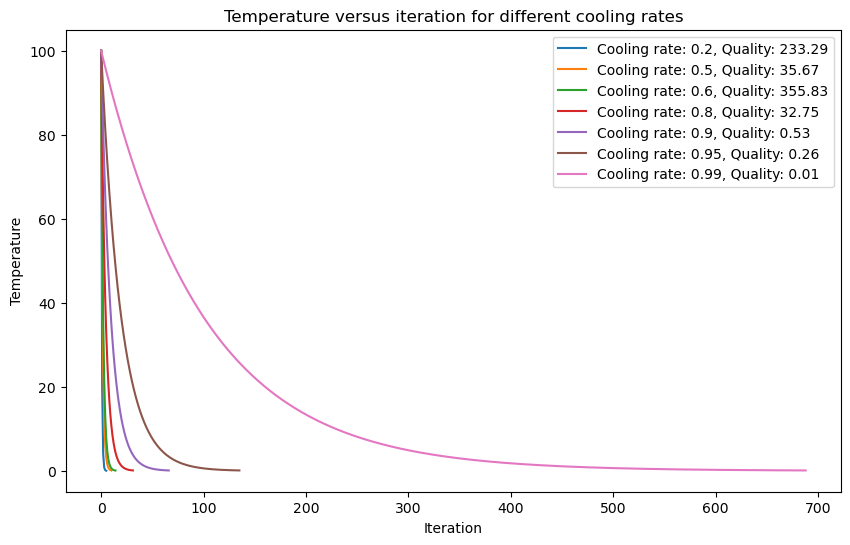

In [26]:
bounds = np.array([[-10, 10], [-10, 10], [-10, 10]])
t_init, t_final, cooling_rate = 100, 0.1, 0.95
cooling_rates = [0.2, 0.5, 0.6, 0.8, 0.9, 0.95, 0.99]

plot_cooling_rates(objective_function, bounds, t_init, t_final, cooling_rates)

# Visualizing the optimization process

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# define the objective function
#def objective(x, y):
#    return np.sin(x) + np.cos(y)

def objective(x, y):

    """
    Objective function to be minimized.
    Args:
        x (float): The x input value.
        y (float): The y input value.
    Returns:
        float: The objective function value.
    """
    return -np.exp(-0.2 * ((x - 2) ** 2 + (y - 2) ** 2)) + 0.5 * np.exp(-0.2 * ((x + 2) ** 2 + (y + 2) ** 2))

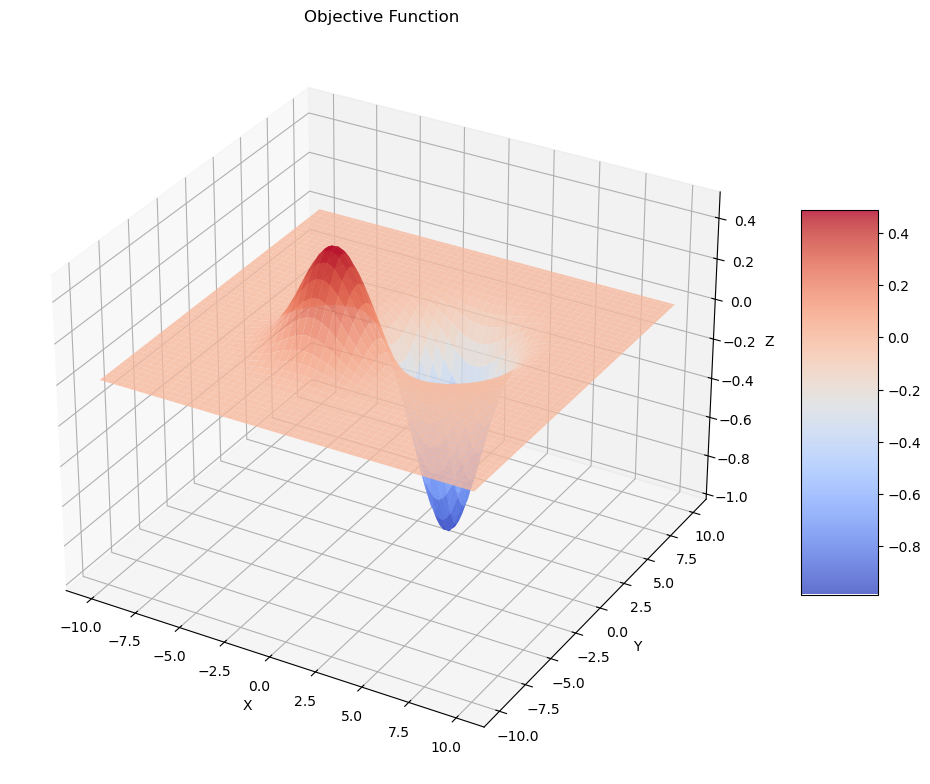

In [13]:
# set up the grid
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)

# compute the objective function on the grid
Z = objective(X, Y)

# create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)

# add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Objective Function')

# show the plot
plt.show()

In [14]:
# define the simulated annealing algorithm function
def simulated_annealing_3d(objective_func, bounds, cooling_rate, max_iterations):

    """
    Simulated annealing algorithm for finding the global minimum of an objective function.
    Args:
        objective_func (function): The objective function to be minimized.
        bounds (numpy.ndarray): A 2D array of shape (n, 2) that defines the bounds for each input parameter.
        cooling_rate (float): The cooling rate for the annealing process.
        max_iterations (int): The maximum number of iterations to perform.
    Returns:
        tuple: A tuple containing the solution history and score history for each iteration.
    """
    # initialize the solution with random values within the bounds
    solution = np.array([np.random.uniform(low, high) for low, high in bounds])
    # calculate the initial objective function value
    best_score = objective_func(*solution)
    # initialize the temperature
    temperature = 100.0
    # initialize the list of scores and solutions
    score_history = [best_score]
    solution_history = [solution]

    # run the simulated annealing algorithm
    for i in range(max_iterations):
        # generate a new solution by randomly changing one parameter
        candidate = solution + np.random.normal(size=len(bounds))
        # ensure the candidate solution is within the bounds
        candidate = np.clip(candidate, bounds[:, 0], bounds[:, 1])
        # calculate the objective function value for the candidate solution
        candidate_score = objective_func(*candidate)
        # calculate the acceptance probability based on the temperature
        # Add a negative sign to the exponent if searching for minimum rather than maximum
        acceptance_prob = np.exp((candidate_score - best_score) / temperature)
        # decide whether to accept the candidate solution or not
        #Change > for best_score to < if searching for a minimum
        if candidate_score > best_score or np.random.rand() < acceptance_prob:
            solution = candidate
            best_score = candidate_score
        # reduce the temperature based on the cooling rate
        temperature *= cooling_rate
        # append the best score and solution to the history lists
        score_history.append(best_score)
        solution_history.append(solution)
    return solution_history, score_history

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21308\2292651473.py:34: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp((candidate_score - best_score) / temperature)


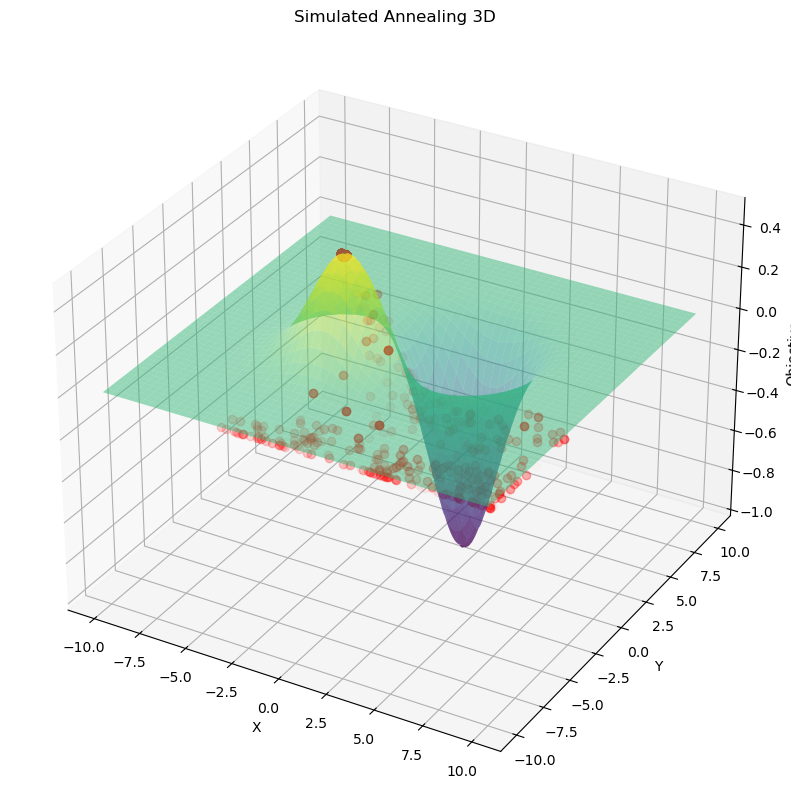

In [17]:
# define the bounds for the input parameters
bounds = np.array([[-10, 10], [-10, 10]])

# set the cooling rate
cooling_rate = 0.95

# run the simulated annealing algorithm
solution_history, score_history = simulated_annealing_3d(objective, bounds, cooling_rate, 1000)



# create a 3D meshgrid for the input parameters
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)

# calculate the objective function for each point in the meshgrid
Z = objective(X, Y)

# create a 3D surface plot of the objective function
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# plot the solutions found by the algorithm for each iteration
for i in range(len(solution_history)):
    x, y = solution_history[i]
    z = score_history[i]

    ax.plot([x], [y], [z], 'ro', alpha=i/len(solution_history))

# set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective')
ax.set_title('Simulated Annealing 3D')

# show the plot
plt.show()